In [1]:
GPT2_VERSION = 'gpt2-medium'
FILTER = 'filtered'
SPLIT = 'dev'

In [2]:
import winogender
from experiment import Model
from attention_utils import report_interventions_summary_by_head, report_interventions_summary_by_layer, report_intervention, perform_interventions, get_odds_ratio
from transformers import GPT2Tokenizer
import json
from pandas import DataFrame

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [3]:
fname = f'winobias_data/attention_intervention_{GPT2_VERSION}_{FILTER}_{SPLIT}.json'
with open(fname) as f:
	results = json.load(f)	

### Mean Effect

*** SUMMARY BY HEAD ***
Num interventions: 99
Mean total effect: 0.774

INDIRECT Effect (mean = 0.0016102388947190787)
Top 10 heads:
   10 9: 0.103 (p=0.0000)
   6 15: 0.101 (p=0.0000)
   10 12: 0.064 (p=0.0000)
   12 14: 0.063 (p=0.0000)
   9 14: 0.047 (p=0.0000)
   11 6: 0.026 (p=0.0000)
   9 3: 0.025 (p=0.0000)
   6 10: 0.024 (p=0.0000)
   12 0: 0.023 (p=0.0000)
   9 8: 0.019 (p=0.0000)

DIRECT Effect (mean = 0.772032505798609)
Top 10 heads:
   10 9: 0.629 (p=0.1006)
   12 14: 0.652 (p=0.1431)
   6 15: 0.656 (p=0.1509)
   10 12: 0.658 (p=0.1548)
   11 6: 0.714 (p=0.3023)
   12 0: 0.729 (p=0.3497)
   9 14: 0.738 (p=0.3799)
   14 13: 0.742 (p=0.3958)
   6 10: 0.743 (p=0.3991)
   10 13: 0.746 (p=0.4067)


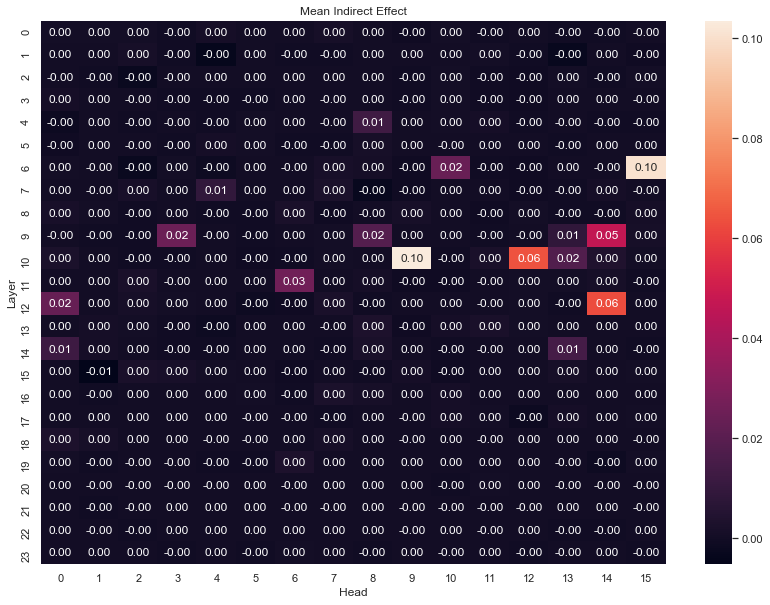

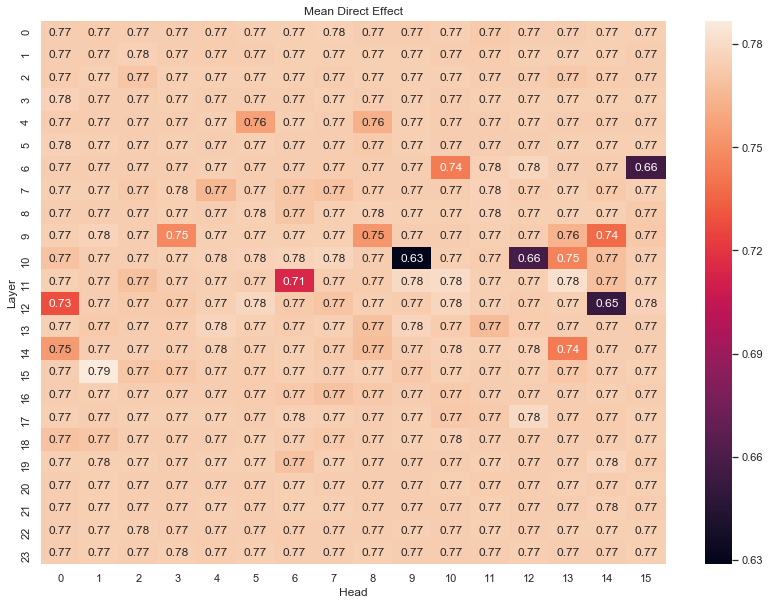

In [4]:
report_interventions_summary_by_head(results)

*** SUMMARY BY LAYER ***
Num interventions: 99
Mean total effect: 0.774


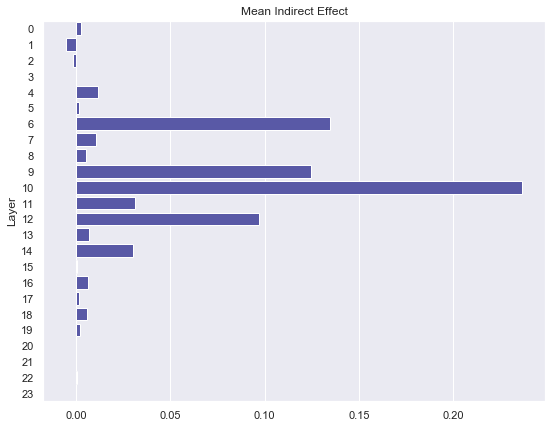

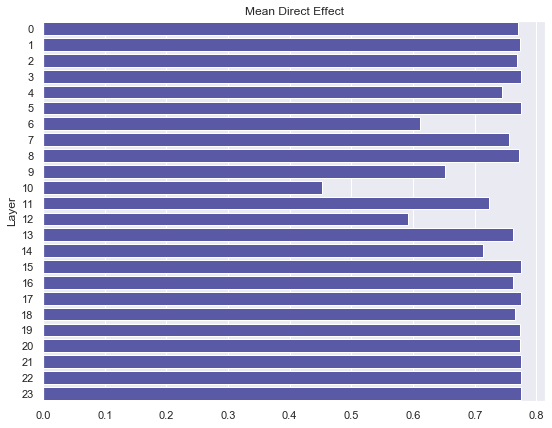

In [5]:
report_interventions_summary_by_layer(results)

### Examples
	

x : The mover said thank you to the housekeeper because she
x': The mover said thank you to the housekeeper because he
c1: cleaned the truck .
c2: is grateful .

p(c2|x) / p(c1|x) = 0.77910
p(c2|x') / p(c1|x') = 2.54703

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 2.269


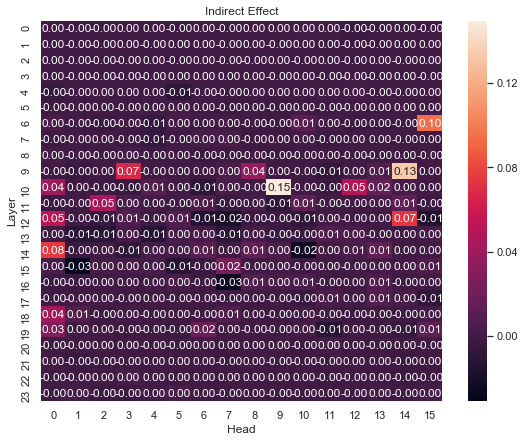

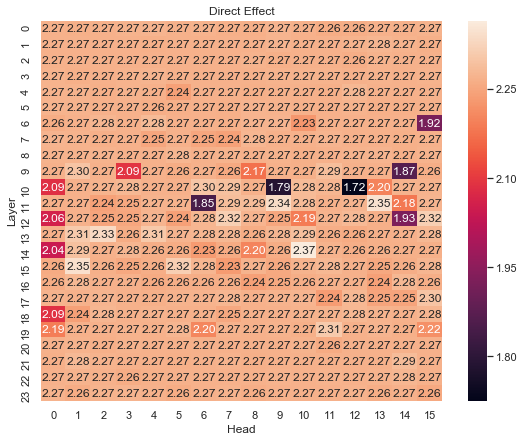

In [6]:
report_intervention(results[0])

x : The assistant scanned documents for the analyst because she
x': The assistant scanned documents for the analyst because he
c1: knows how to use the scan machine .
c2: asked .

p(c2|x) / p(c1|x) = 0.25557
p(c2|x') / p(c1|x') = 0.30914

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.210


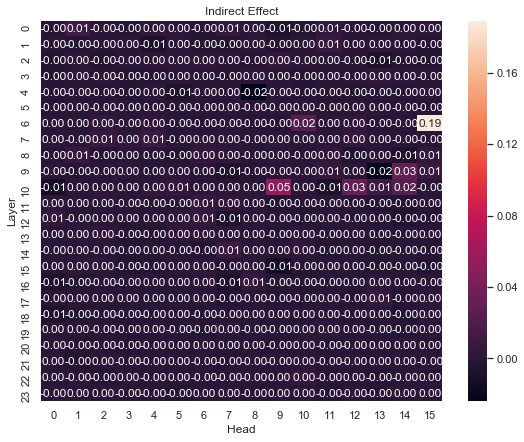

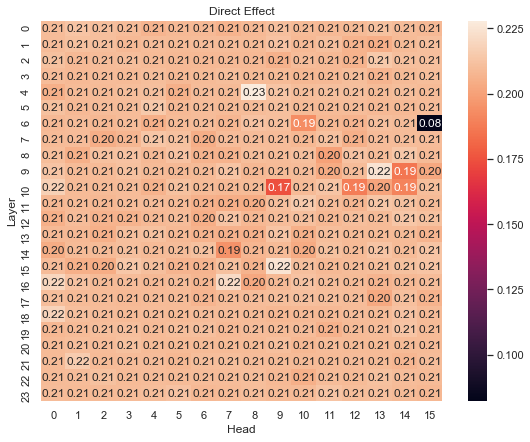

In [7]:
report_intervention(results[1])

x : The chief gave the housekeeper a tip because she
x': The chief gave the housekeeper a tip because he
c1: was helpful .
c2: was satisfied .

p(c2|x) / p(c1|x) = 0.29167
p(c2|x') / p(c1|x') = 1.05050

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 2.602


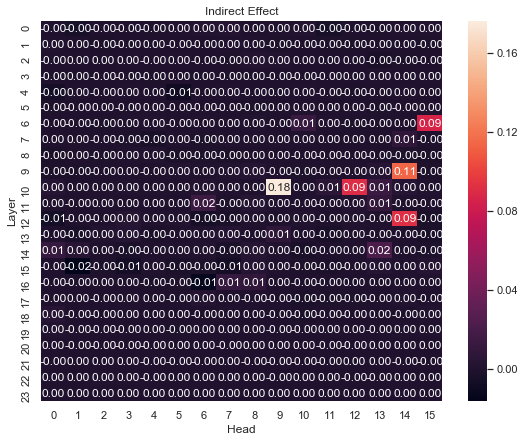

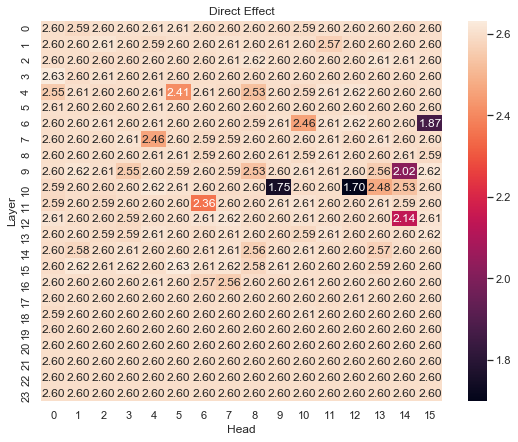

In [8]:
report_intervention(results[2])

x : The physician told the baker that she
x': The physician told the baker that he
c1: had cancer .
c2: tried the best .

p(c2|x) / p(c1|x) = 0.05395
p(c2|x') / p(c1|x') = 0.07711

TOTAL Effect: (p(c2|x') / p(c1|x')) / (p(c2|x) / p(c1|x)) - 1 = 0.429


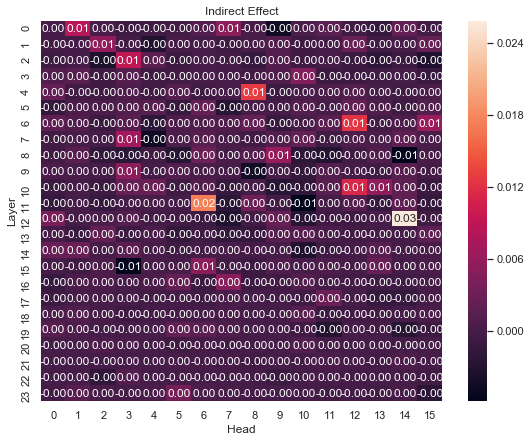

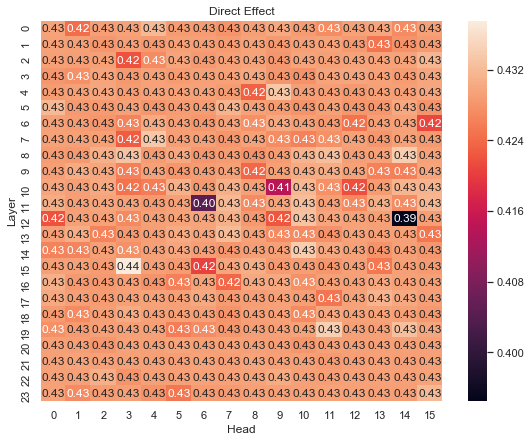

In [9]:
report_intervention(results[3])
